## Actividad 4.2 - Detección de Señales de Tránsito ##

MNA - Inteligencia Artificial Aplicada

MR4010 - Navegación autónoma

Dr. David Antonio Torres

Tutor: Dr. Emanuel Torres Ríos

Integrantes:
- Josias Ruiz P.
- Mauricio X. Muñoz E.
- Luis Navarrete B.
- Emmanuel González Calitl

### 0. Cargar librerias a utilizar

In [ ]:
#Se cargan las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import os

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model
import cv2

np.random.seed(0)

### 1. Lectura de las imágenes

In [ ]:
def read_images(directory_path):
    X = []
    y = []

    valid_extensions = ('.jpg', '.jpeg', '.png')

    subdirectories = [subdir for subdir in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, subdir))]

    for subdir in subdirectories:
        subdirectory_path = os.path.join(directory_path, subdir)
        if not os.listdir(subdirectory_path):
            continue

        for filename in os.listdir(subdirectory_path):
            if filename.lower().endswith(valid_extensions):
                image_path = os.path.join(subdirectory_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (30, 30))
                X.append(image)

                label = int(subdir)
                y.append(label)

    return np.array(X), np.array(y)

In [ ]:
def read_images_val(directory_path):
    X = []

    valid_extensions = ('.jpg', '.jpeg', '.png')

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(valid_extensions):
            image_path = os.path.join(directory_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (30, 30))
            X.append(image)

    return np.array(X)

In [ ]:
(X, y) = read_images('C:/Users/josia/MNA/08_Navegacion/archive/Train')

In [ ]:
(X_val) = read_images_val('C:/Users/josia/MNA/08_Navegacion/archive/Test')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=True, random_state=1)
#X_train, y_train = train_test_split(X, y, train_size=1, shuffle=True, random_state=1)

In [ ]:
print(f'Forma de X train : {X_train.shape}')
print(f'Forma de X test : {X_test.shape}')

Forma de X train : (31367, 30, 30, 3)
Forma de X test : (7842, 30, 30, 3)


In [ ]:
print(f'Forma de X train : {X_val.shape}')

Forma de X train : (12630, 30, 30, 3)


Text(0, 0.5, 'Número de Muestras')

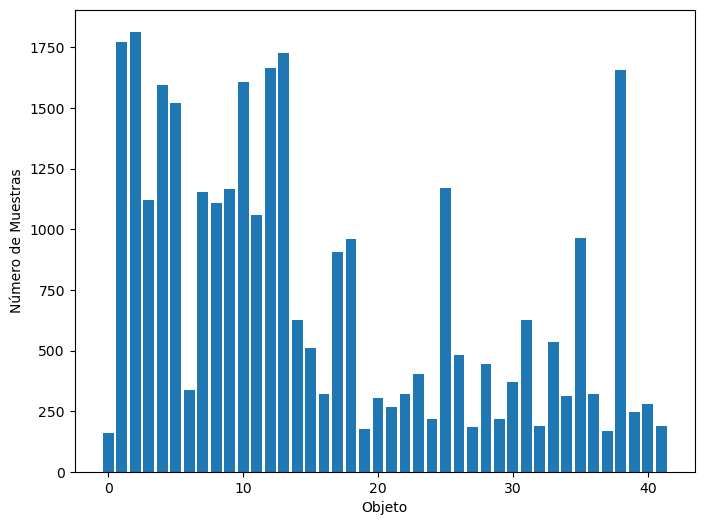

In [ ]:
n_muestras = []
n_objetos = 42

for n in range(n_objetos):
  x_sel = X_train[y_train == n]
  n_muestras.append(len(x_sel))

plt.figure(figsize=(8,6))
plt.bar(range(0, n_objetos), n_muestras)
plt.xlabel('Objeto')
plt.ylabel('Número de Muestras')

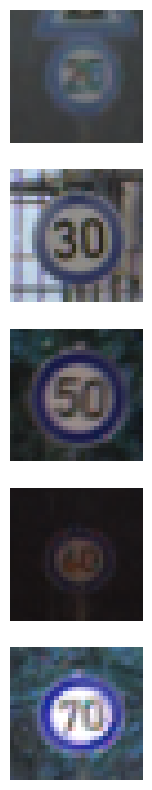

In [ ]:
n_objetos = 5

fig, axs = plt.subplots(n_objetos, figsize = (10,10))
for n in range(n_objetos):
  x_sel = X_train[y_train == n]
  axs[n].imshow(x_sel[0])
  axs[n].axis('off')

One-hot Encoding para las etiquetas de ambos sets

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Se define el modelo.

El parametro input_shape se toma de X_train para reflejar las dimensiones de las imágenes a color

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = (30,30,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))
# model.add(AveragePooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.5))

# Flatten hace unidimensional las imagenes resultantes
model.add(Flatten())

# Fully connected
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))

# Fully connected
model.add(Dense(units = 43, activation = 'softmax'))

model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                    

C:\Users\josia\anaconda3\envs\MNA\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Se separa un 20% del set de entrenamiento para fines de validación

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.8, epochs = 10, batch_size = 32, verbose = 1, shuffle = True)

Epoch 1/10
197/197 [==============================] - 11s 52ms/step - loss: 2.1303 - accuracy: 0.5638 - val_loss: 0.5947 - val_accuracy: 0.8509
Epoch 2/10
197/197 [==============================] - 10s 52ms/step - loss: 0.3728 - accuracy: 0.9026 - val_loss: 0.3281 - val_accuracy: 0.9191
Epoch 3/10
197/197 [==============================] - 10s 53ms/step - loss: 0.1696 - accuracy: 0.9530 - val_loss: 0.1933 - val_accuracy: 0.9499
Epoch 4/10
197/197 [==============================] - 10s 51ms/step - loss: 0.1390 - accuracy: 0.9613 - val_loss: 0.1288 - val_accuracy: 0.9683
Epoch 5/10
197/197 [==============================] - 10s 51ms/step - loss: 0.0728 - accuracy: 0.9796 - val_loss: 0.1400 - val_accuracy: 0.9684
Epoch 6/10
197/197 [==============================] - 10s 51ms/step - loss: 0.0714 - accuracy: 0.9810 - val_loss: 0.2049 - val_accuracy: 0.9562
Epoch 7/10
197/197 [==============================] - 10s 51ms/step - loss: 0.1377 - accuracy: 0.9675 - val_loss: 0.1991 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose = 1)

print('Test loss: ', scores[0])
print('Test accuracy:', scores[1])

246/246 [==============================] - 2s 7ms/step - loss: 0.1695 - accuracy: 0.9667
Test loss:  0.16948114335536957
Test accuracy: 0.9667176604270935


Text(0.5, 0, 'epoch')

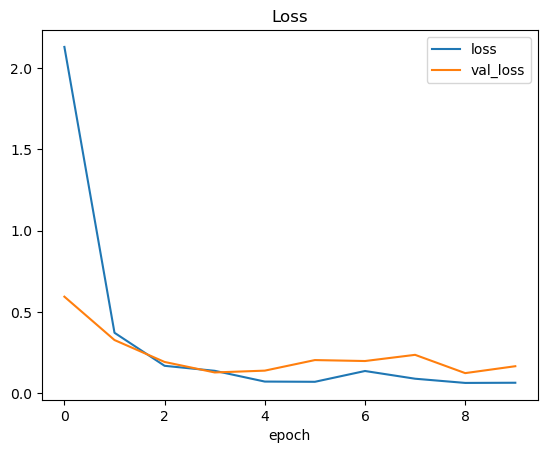

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

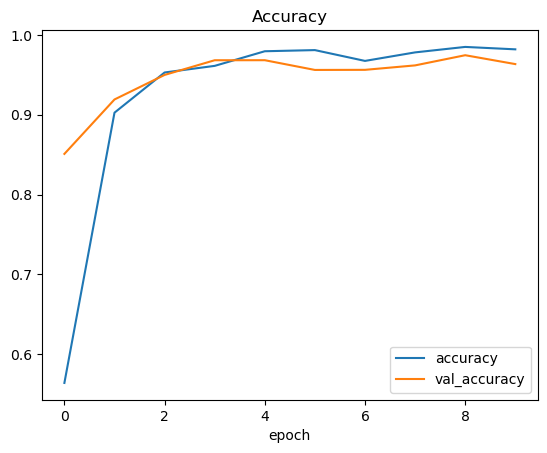

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Forma de X train : (1, 30, 30, 3)


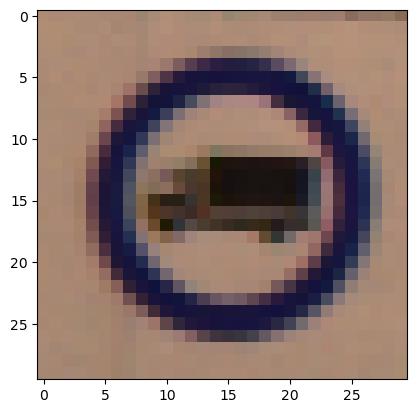

In [ ]:
pltimage=X_val[0]
plt.imshow(pltimage)
pltimage = pltimage.reshape(1, 30, 30, 3)
print(f'Forma de X train : {pltimage.shape}')

In [ ]:
prediction = np.argmax(model.predict(pltimage), axis = -1)
print('predicted digit: ', str(prediction))

1/1 [==============================] - 0s 60ms/step
predicted digit:  [16]
